In [78]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Tratamiento de datos 

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/BankCustomerData.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [61]:
df.shape

(42639, 17)

In [41]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [42]:
#Verificar si hay datos nulos
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [43]:
#Ver tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


##Cambio de datos a int

In [52]:
print(df['job'].unique(),"\n",df['marital'].unique(),"\n",df['education'].unique(),"\n",df['default'].unique()
      ,"\n",df['housing'].unique(),"\n",df['loan'].unique(),"\n",df['contact'].unique(),"\n",df['month'].unique(),"\n",
        df['poutcome'].unique(),"\n",df['term_deposit'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
 ['married' 'single' 'divorced'] 
 ['tertiary' 'secondary' 'unknown' 'primary'] 
 ['no' 'yes'] 
 ['yes' 'no'] 
 ['no' 'yes'] 
 ['unknown' 'cellular' 'telephone'] 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 
 ['unknown' 'failure' 'other' 'success'] 
 ['no' 'yes']


In [53]:
values_job = {'job' : {'management':1,'technician':2,'entrepreneur':3,'blue-collar':4,'unknown':5 , 'retired' : 6 ,
                       'admin.':7 , 'services' : 8, 'self-employed':9 , 'unemployed' : 10, 'housemaid':11 , 'student' :12}}

values_martial = {'marital' : { 'married':1 , 'single': 2, 'divorced':3} } 

values_education = {'education' : {'tertiary':1,'secondary':2, 'unknown' : 3 ,'primary':4}}

values_default = {'default': {'no': 0, 'yes':1}}

values_housing = {'housing' : {'yes': 1, 'no':0}}

values_loan = {'loan':{'no': 0, 'yes':1}}

values_contact = {'contact' : {'unknown':0, 'cellular':1, 'telephone':2}}

values_month = {'month' : {'may' : 5, 'jun': 6, 'jul' :7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan' :1, 'feb':2, 'mar':3, 'apr':4, 'sep':9}}

values_poutcome = {'poutcome' : {'unknown' : 0, 'failure' : 1, 'other':2, 'success':3}}

values_term_deposit = {'term_deposit': {'no' : 0, 'yes' : 1}}

In [54]:
df.replace(values_job,inplace=True)
df.replace(values_martial,inplace=True)
df.replace(values_education,inplace=True)
df.replace(values_default,inplace=True)
df.replace(values_housing,inplace=True)
df.replace(values_loan,inplace=True)
df.replace(values_contact,inplace=True)
df.replace(values_month,inplace=True)
df.replace(values_poutcome,inplace=True)
df.replace(values_term_deposit,inplace=True)

In [ ]:
df.info()

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,2,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,3,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,4,1,3,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,5,2,3,0,1,0,0,0,5,5,198,1,-1,0,0,0


#Matriz correlacion

In [55]:
cols=['default','housing','loan','contact','month','day','poutcome']
for col in cols:
  df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           42639 non-null  int64   
 1   job           42639 non-null  int64   
 2   marital       42639 non-null  int64   
 3   education     42639 non-null  int64   
 4   default       42639 non-null  category
 5   balance       42639 non-null  int64   
 6   housing       42639 non-null  category
 7   loan          42639 non-null  category
 8   contact       42639 non-null  category
 9   day           42639 non-null  category
 10  month         42639 non-null  category
 11  duration      42639 non-null  int64   
 12  campaign      42639 non-null  int64   
 13  pdays         42639 non-null  int64   
 14  previous      42639 non-null  int64   
 15  poutcome      42639 non-null  category
 16  term_deposit  42639 non-null  int64   
dtypes: category(7), int64(10)
memory usage: 3.5 MB


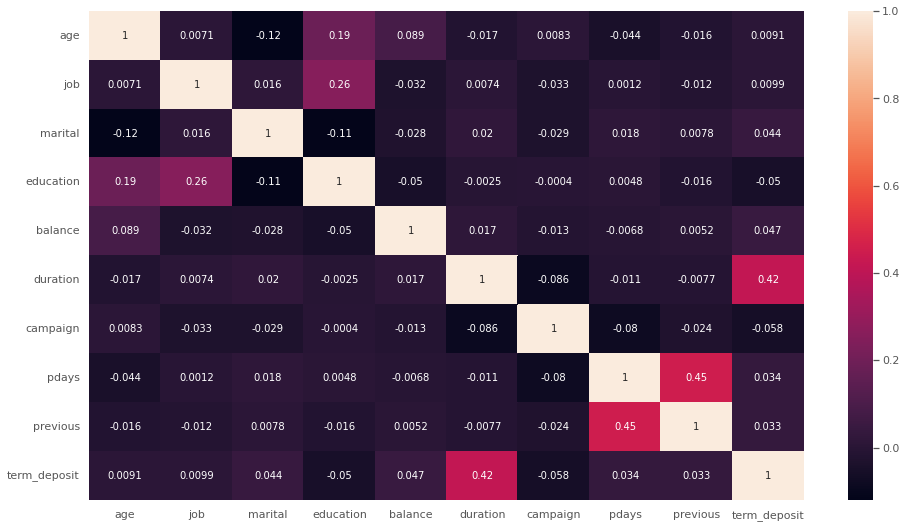

In [56]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

#Grafica

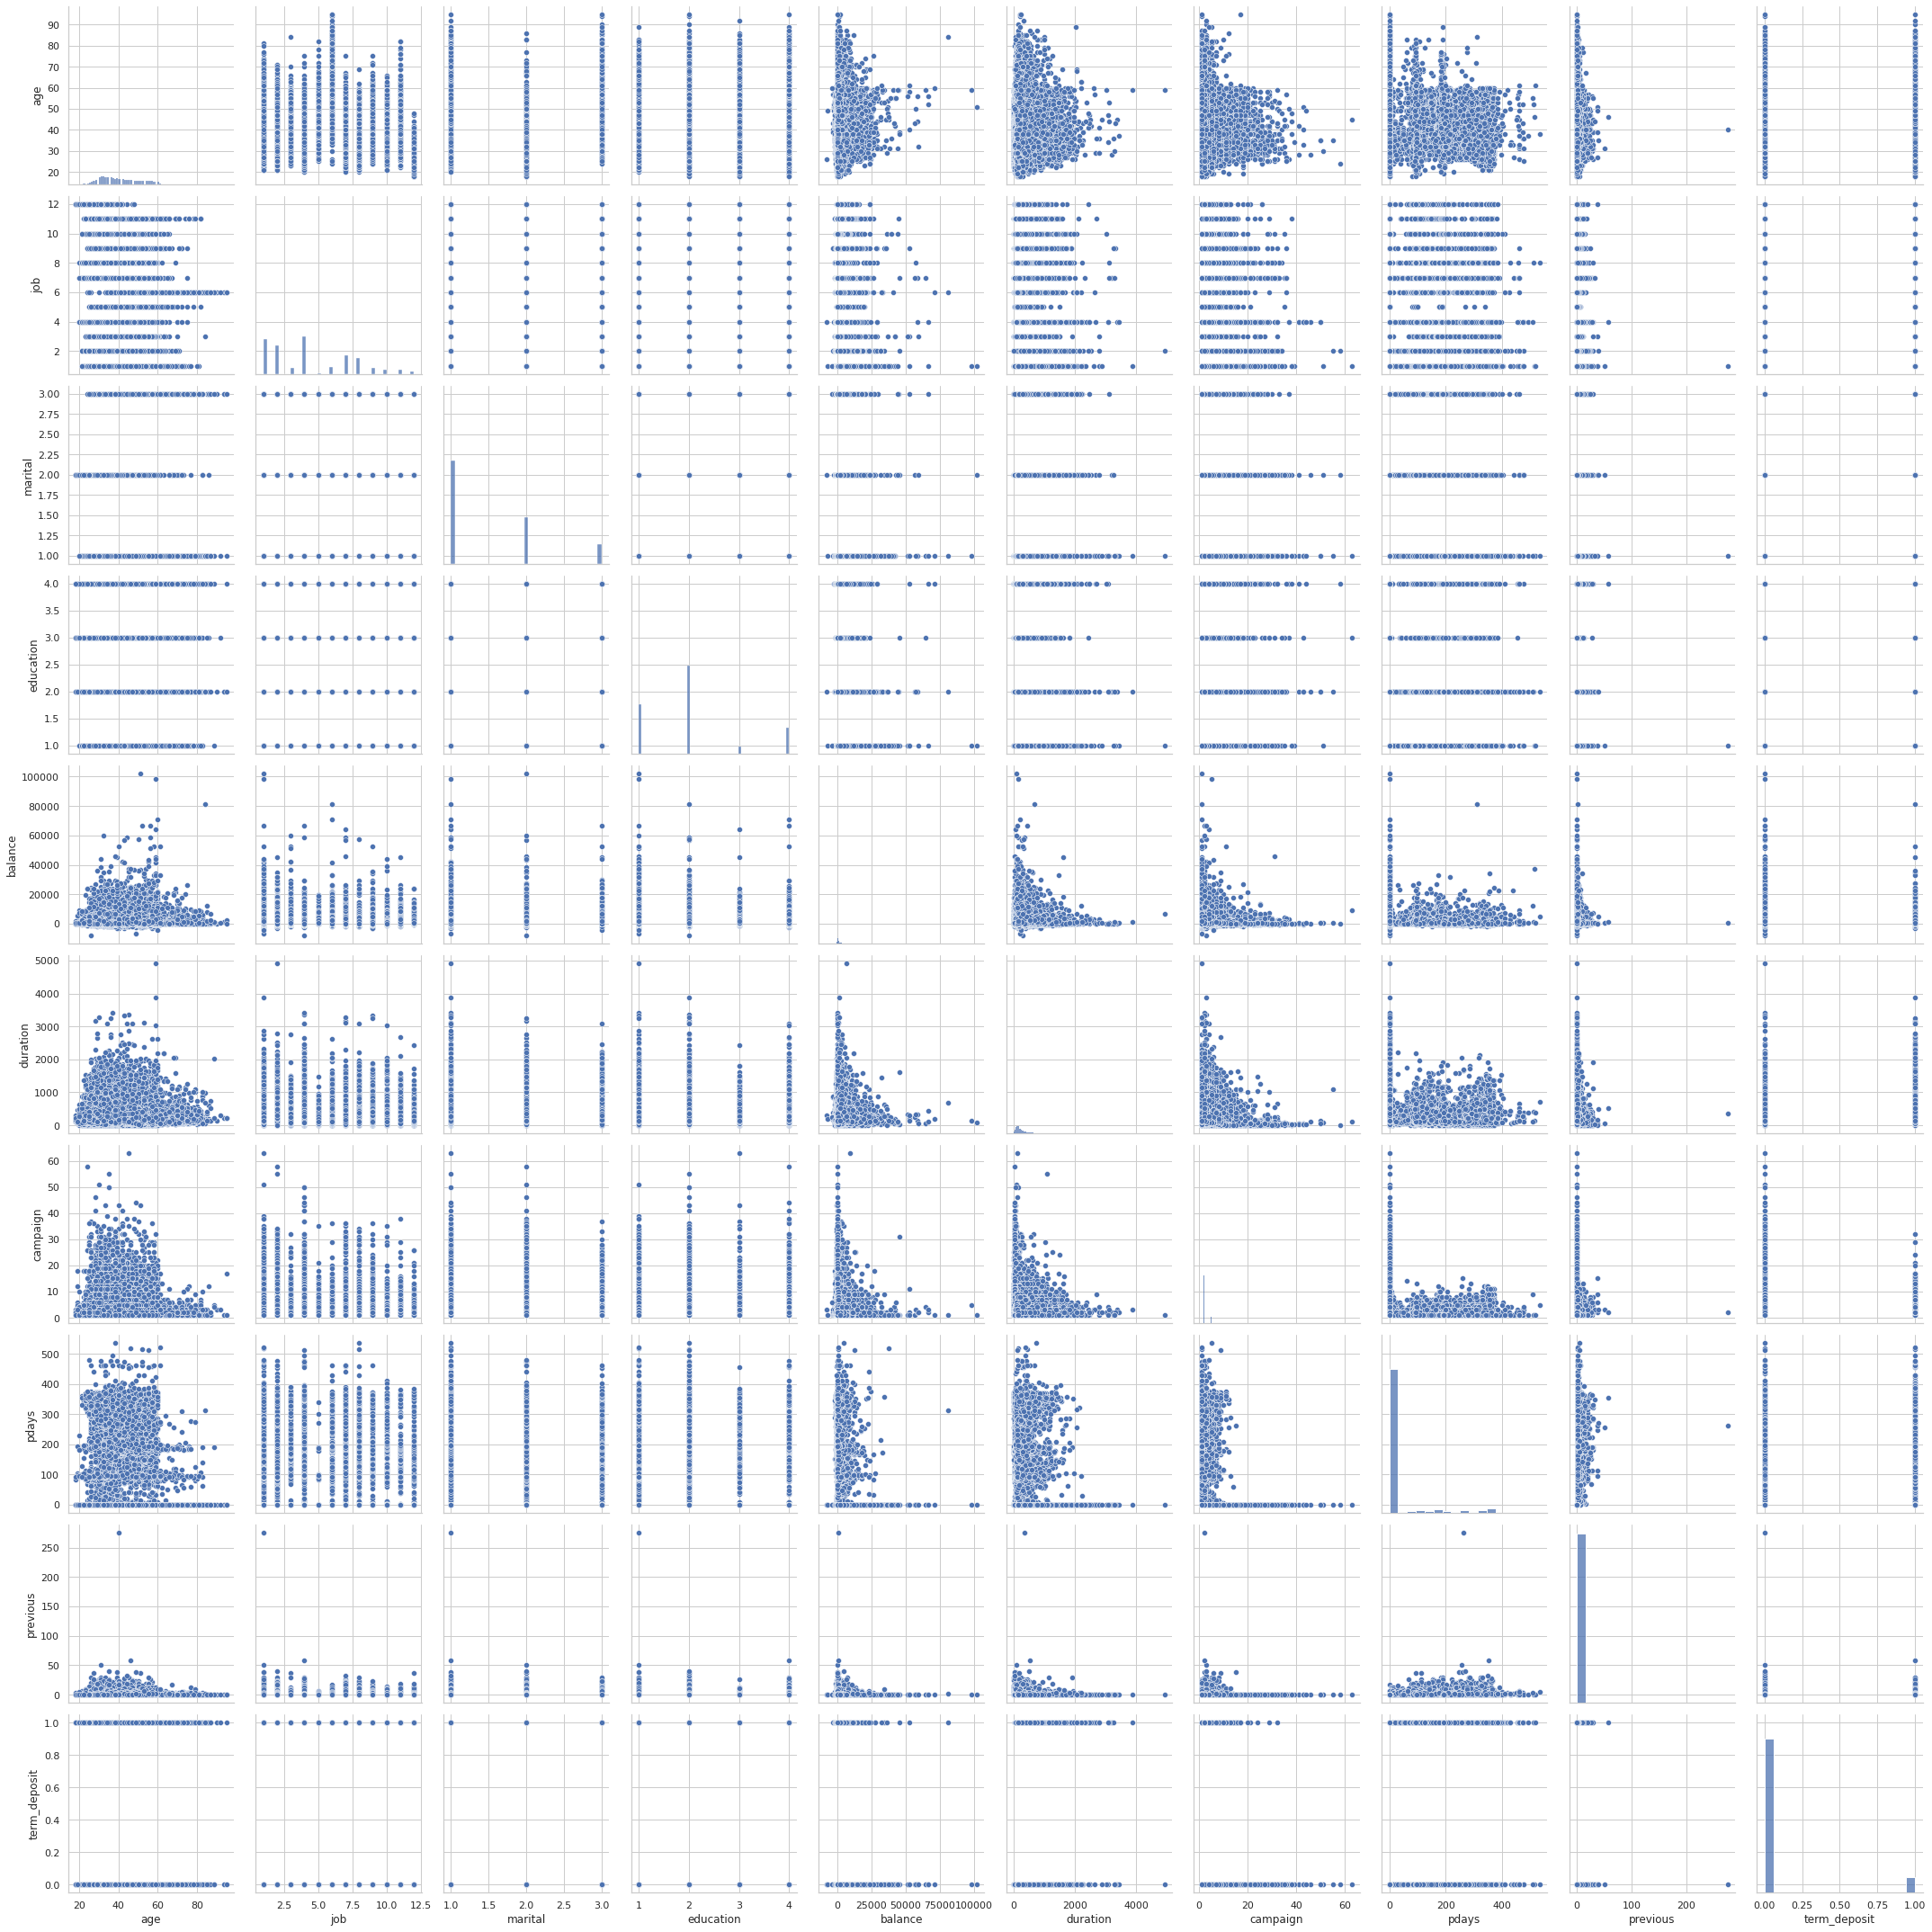

In [58]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, height=3.0);
plt.tight_layout()
plt.show()

#Entrenamiento por los metodos:
___



1.   Regresion logistica
2.   Regresion Lineal
3.   Arboles de desicion
4.   Support Vector Machine
5.   Vecino mas cercano KMN



##Separando los datos TRAIN y TEST

Tome los datos de term_deposit ya que este valor nos da si el cliente solicito un deposito o no 

In [59]:
x = df.drop(columns='term_deposit') #Escogi el resto de variables menos el "term_deposit"
y = df.term_deposit

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=20)

##Regresion Logistica

In [ ]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()
#entrenando modelo de regresión logistica
regresion_logistica.fit(x_train,y_train)

In [64]:
print("Precision del modelo por regresin logistica: ",regresion_logistica.score(x_train,y_train)*100)

Precision del modelo por regresin logistica:  91.01756031778605


In [87]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = regresion_logistica.predict(x_train)
# Predecimos sobre nuestro set de test
y_test_pred = regresion_logistica.predict(x_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)*100)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test)*100)
accuary_global = regresion_logistica.score(x_test, y_test)

Accuracy sobre conjunto de Train: 91.01756031778605
Accuracy sobre conjunto de Test: 91.32270168855536


#Regresion Lineal

In [90]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_train, y_train)
y_pred = regresion_lineal.predict(x_test)
print("Precicion con el modelo REGRESION LINEAL: ",regresion_lineal.score(x_train,y_train)*100)

Precicion con el modelo REGRESION LINEAL:  22.65787791521845


#Arboles de desicion

In [69]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(x_train, y_train)
    score = arbol_clasi.score(x_test, y_test)
    accuracy.append(score)

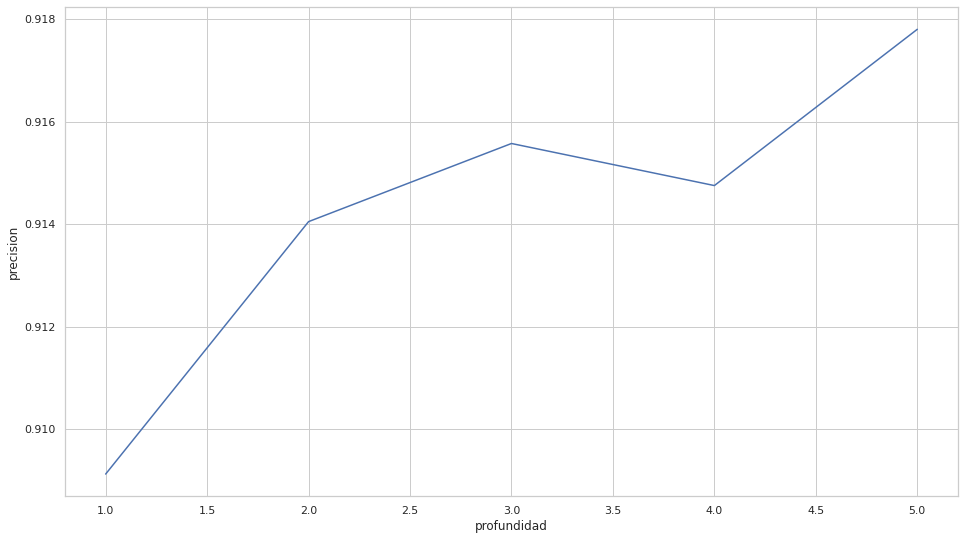

In [70]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('precision')
plt.xlabel('profundidad')
plt.grid(True)
plt.show()

In [72]:
arbol_clasi = DecisionTreeClassifier(max_depth = 5, random_state = 0)

arbol_clasi.fit(x_train, y_train)

accuary = arbol_clasi.score(x_test, y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 91.78001876172608 %


In [80]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol_clasi.predict(x_train)
# Predecimos sobre nuestro set de test
y_test_pred = arbol_clasi.predict(x_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)*100)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test)*100)
accuary_global = arbol_clasi.score(x_test, y_test)


Accuracy sobre conjunto de Train: 91.91170003811088
Accuracy sobre conjunto de Test: 91.78001876172608


##Graficando el arbol

In [81]:
x.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [83]:
#Instanciamos la lista de valores que toma el arbol
class_names_list=list(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=class_names_list, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_1.png')

True

#Support Vector Machine

In [85]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Precision con el modelo SUPPORT VECTOR MACHINE: ",svm.score(x_train,y_train)*100)

Precision con el modelo SUPPORT VECTOR MACHINE:  90.67456245785817


In [92]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = svm.predict(x_train)
# Predecimos sobre nuestro set de test
y_test_pred = svm.predict(x_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)*100)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test)*100)
accuary_global = svm.score(x_test, y_test)

Accuracy sobre conjunto de Train: 90.67456245785817
Accuracy sobre conjunto de Test: 90.92401500938087


#Vecino mas cercano KMN

In [86]:
kme = KNeighborsClassifier(n_neighbors = 3)
kme.fit(x_train,y_train)
y_pred = kme.predict(x_test)
print("Precision con el modelo VECINO MAS CERCANO (KMN) : ",kme.score(x_train,y_train)*100)

Precision con el modelo VECINO MAS CERCANO (KMN) :  93.49769868957229


In [93]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = kme.predict(x_train)
# Predecimos sobre nuestro set de test
y_test_pred = kme.predict(x_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)*100)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test)*100)
accuary_global = kme.score(x_test, y_test)

Accuracy sobre conjunto de Train: 93.49769868957229
Accuracy sobre conjunto de Test: 90.12664165103189


#Conclusion
___

En conclusion el mejor metodo para el entrenamiento de esta ia seria el VECINO MAS CERCANO ya que con este obtenemos un 93% en el conjunto Train siendo superior al de test y siendo un porcentaje optimo para el entrenamiento con un 80 para el train y 20 para el test, en los otros metodos observamos que el porcentaje del test es superior al del train esto quiere decir que tocaria modificar la cantidad de datos para cada uno e intentar cambiar el random state.